# Name: Luu Minh Quan
# ID: ITITIU15033

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import re
from bs4 import BeautifulSoup
import requests
import sklearn.feature_selection
from io import StringIO
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.patches as mpatches
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
%matplotlib inline
sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
r= requests.get(url)
html_text = r.text
soup = BeautifulSoup(html_text, 'html5lib')
html_doc = soup.get_text()
csv_content = StringIO(html_doc)

In [9]:
df = pd.read_csv(csv_content, header=None, names=["sepal-length","sepal-width","petal-length","petal-width","class"])
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5,1,'LuuMinhQuan_ITITIU15033')

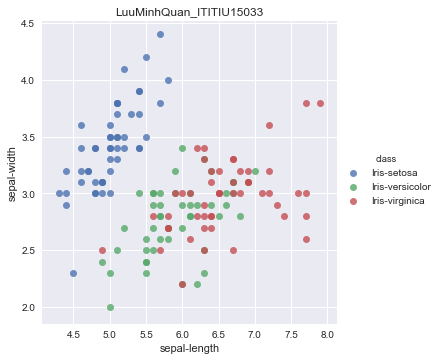

In [12]:
sns.lmplot(x='sepal-length', y='sepal-width', hue='class', legend=True, fit_reg=False, data=df)
plt.title('LuuMinhQuan_ITITIU15033')

Text(0.5,1,'LuuMinhQuan_ITITIU15033')

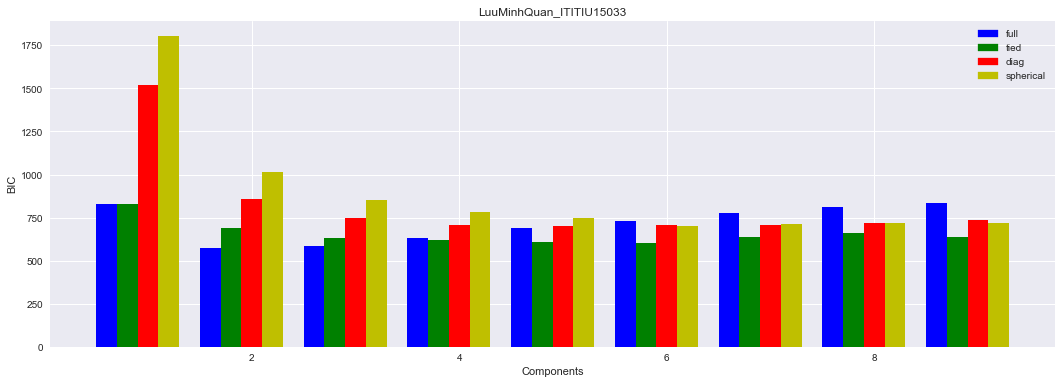

In [41]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
plt.figure(figsize=(18, 6))
for i in range(1,10):
    gmm = GMM(n_components=i, covariance_type='full').fit(x)
    plt.bar(i - 0.4, gmm.bic(x), color = 'b', width = 0.2)
    gmm = GMM(n_components=i, covariance_type='tied').fit(x)
    plt.bar(i - 0.2, gmm.bic(x), color = 'g', width = 0.2)
    gmm = GMM(n_components=i, covariance_type='diag').fit(x)
    plt.bar(i + 0.0, gmm.bic(x), color = 'r', width = 0.2)
    gmm = GMM(n_components=i, covariance_type='spherical').fit(x)
    plt.bar(i + 0.2, gmm.bic(x), color = 'y', width = 0.2)
    
plt.legend(handles=[mpatches.Patch(color=a, label=b) for (a,b) in zip(['b','g','r','y'],['full','tied','diag','spherical'])])
plt.xlabel('Components')
plt.ylabel('BIC')
plt.title('LuuMinhQuan_ITITIU15033')

Text(0.5,1,'LuuMinhQuan_ITITIU15033')

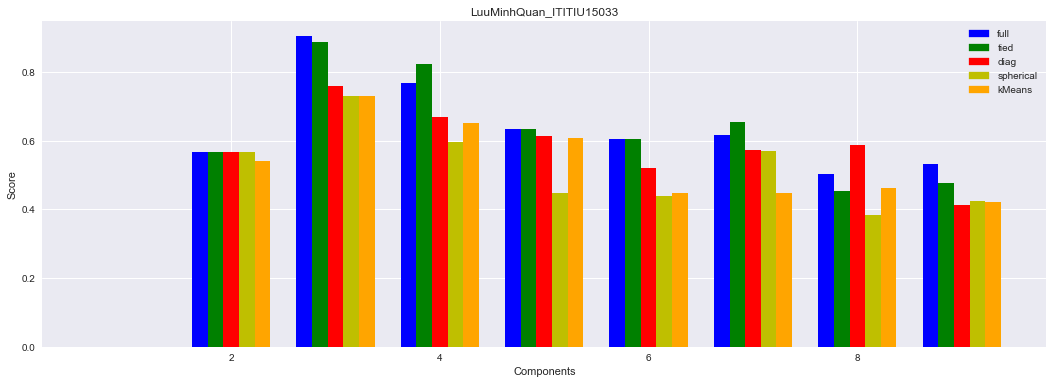

In [42]:
plt.figure(figsize=(18, 6))
for i in range(1,10):
    gmm = GMM(n_components=i, covariance_type='full').fit(x)
    plt.bar(i - 0.3, adjusted_rand_score(y, gmm.predict(x)), color = 'b', width = 0.15)
    gmm = GMM(n_components=i, covariance_type='tied').fit(x)
    plt.bar(i - 0.15, adjusted_rand_score(y, gmm.predict(x)), color = 'g', width = 0.15)
    gmm = GMM(n_components=i, covariance_type='diag').fit(x)
    plt.bar(i + 0.0, adjusted_rand_score(y, gmm.predict(x)), color = 'r', width = 0.15)
    gmm = GMM(n_components=i, covariance_type='spherical').fit(x)
    plt.bar(i + 0.15, adjusted_rand_score(y, gmm.predict(x)), color = 'y', width = 0.15)
    kmeans = KMeans(n_clusters=i, random_state=42).fit(x)
    plt.bar(i + 0.3, adjusted_rand_score(y, kmeans.predict(x)), color = 'orange', width = 0.15)
    
plt.legend(handles=[mpatches.Patch(color=a, label=b) for (a,b) in zip(['b','g','r','y','orange'],['full','tied','diag','spherical','kMeans'])])
plt.xlabel('Components')
plt.ylabel('Score')
plt.title('LuuMinhQuan_ITITIU15033')

In [43]:
?gmm.bic

Signature: gmm.bic(X)
Docstring:
Bayesian information criterion for the current model on the input X.

Parameters
----------
X : array of shape (n_samples, n_dimensions)

Returns
-------
bic : float
    The lower the better.
File:      d:\anaconda\envs\py36\lib\site-packages\sklearn\mixture\gaussian_mixture.py
Type:      method


In [44]:
?adjusted_rand_score

Signature: adjusted_rand_score(labels_true, labels_pred)
Docstring:
Rand index adjusted for chance.

The Rand Index computes a similarity measure between two clusterings
by considering all pairs of samples and counting pairs that are
assigned in the same or different clusters in the predicted and
true clusterings.

The raw RI score is then "adjusted for chance" into the ARI score
using the following scheme::

    ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

The adjusted Rand index is thus ensured to have a value close to
0.0 for random labeling independently of the number of clusters and
samples and exactly 1.0 when the clusterings are identical (up to
a permutation).

ARI is a symmetric measure::

    adjusted_rand_score(a, b) == adjusted_rand_score(b, a)

Read more in the :ref:`User Guide <adjusted_rand_score>`.

Parameters
----------
labels_true : int array, shape = [n_samples]
    Ground truth class labels to be used as a reference

labels_pred : array, shape = [n_samples]
 

* `adjusted_rand_score` for full is always the highest in two cases: 2 and 3 components, next one is fied, diag
* K-Means Clustering: It is an algorithm, which classifies samples based on attributes/features into K number of clusters. 
    * Clustering or grouping of samples is done by minimizing the distance between sample and the centroid. 
* Guassian Mixture:
    * Instead of Hard assgning data points to a cluster, if we are uncertain about the data points where they belong or to which group, we use this method. 
    * It uses probability of a sample to determine the feasibility of it belonging to a cluster

# Uber dataset

In [48]:
url = 'https://raw.githubusercontent.com/bjherger/Uber-DS-Challenge/master/data/input/ds_challenge_v2_1_data.csv'
r = requests.get(url)
html_text = r.text
soup = BeautifulSoup(html_text, 'html5lib')
html_doc = soup.get_text()
csv_content = StringIO(html_doc)

In [49]:
uber_X = pd.read_csv(csv_content, parse_dates=['signup_date', 'bgc_date', 'vehicle_added_date', 'first_completed_date'], na_values=['', 'NA'])
uber_X.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT
1,2,Strark,windows,Paid,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT
2,3,Wrouver,windows,Organic,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT
3,4,Berton,android web,Referral,2016-01-29,2016-02-03,2016-02-03,Toyota,Corolla,2016.0,2016-02-03
4,5,Strark,android web,Referral,2016-01-10,2016-01-25,2016-01-26,Hyundai,Sonata,2016.0,NaT


### Convert into appropriate data types

In [50]:
uber_X['city_name'] = pd.Categorical.from_array(uber_X['city_name']).labels
uber_X['signup_os'] = pd.Categorical.from_array(uber_X['signup_os']).labels
uber_X['signup_channel'] = pd.Categorical.from_array(uber_X['signup_channel']).labels

uber_X.loc[pd.notna(uber_X['vehicle_make']), 'vehicle_make'] = pd.Categorical.from_array(uber_X.loc[pd.notna(uber_X['vehicle_make']), 'vehicle_make']).labels
uber_X.loc[pd.notna(uber_X['vehicle_model']), 'vehicle_model'] = pd.Categorical.from_array(uber_X.loc[pd.notna(uber_X['vehicle_model']), 'vehicle_model']).labels

uber_X.loc[pd.notna(uber_X['vehicle_year']), 'vehicle_year'] = uber_X.loc[pd.notna(uber_X['vehicle_year']), 'vehicle_year'].astype(int)
uber_X[uber_X['vehicle_year']==0]=np.NaN

uber_X.head()

D:\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  if __name__ == '__main__':
D:\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  if __name__ == '__main__':
D:\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  from ipykernel import kernelapp as app
D:\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  from ipykernel import kernelapp as app
D:\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  app.launch_new_instance()
D:\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  app.launch_new_instance()
D:\Ana

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1.0,1.0,1.0,1.0,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT
1,2.0,1.0,4.0,1.0,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT
2,3.0,2.0,4.0,0.0,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT
3,4.0,0.0,0.0,2.0,2016-01-29,2016-02-03,2016-02-03,42,79,2016.0,2016-02-03
4,5.0,1.0,0.0,2.0,2016-01-10,2016-01-25,2016-01-26,17,293,2016.0,NaT


In [51]:
uber_X.dropna(how='all', inplace=True)
uber_X[pd.isna(uber_X['signup_date'])]

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date


### Create a new feature representing whether a driver took a first drive

In [52]:
uber_X['ynfirst'] = ['Yes' if pd.notna(uber_X.loc[i, 'first_completed_date']) else 'No' for i in uber_X.index]
uber_X['ynfirst'] = uber_X['ynfirst'].astype('category')
uber_X.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,ynfirst
0,1.0,1.0,1.0,1.0,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT,No
1,2.0,1.0,4.0,1.0,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT,No
2,3.0,2.0,4.0,0.0,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT,No
3,4.0,0.0,0.0,2.0,2016-01-29,2016-02-03,2016-02-03,42,79,2016.0,2016-02-03,Yes
4,5.0,1.0,0.0,2.0,2016-01-10,2016-01-25,2016-01-26,17,293,2016.0,NaT,No


* We wish to use the dates for predictive modeling in the future, thus we transform the background check date and add vehicle information date into ‘response times’. These represent the time it takes for drivers to take action after signing up

In [53]:
uber_X['bgc_response'] = [(uber_X.loc[i, 'bgc_date']-uber_X.loc[i, 'signup_date']).days 
                          if pd.notna(uber_X.loc[i, 'bgc_date']) and pd.notna(uber_X.loc[i, 'signup_date']) 
                          else 100 for i in uber_X.index]
uber_X['vehicle_added_response'] = [(uber_X.loc[i, 'vehicle_added_date']-uber_X.loc[i, 'signup_date']).days 
                                     if pd.notna(uber_X.loc[i, 'vehicle_added_date']) and pd.notna(uber_X.loc[i, 'signup_date']) 
                                     else 100 for i in uber_X.index]
uber_X.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,ynfirst,bgc_response,vehicle_added_response
0,1.0,1.0,1.0,1.0,2016-01-02,NaT,NaT,NaN,NaN,NaN,NaT,No,100,100
1,2.0,1.0,4.0,1.0,2016-01-21,NaT,NaT,NaN,NaN,NaN,NaT,No,100,100
2,3.0,2.0,4.0,0.0,2016-01-11,2016-01-11,NaT,NaN,NaN,NaN,NaT,No,0,100
3,4.0,0.0,0.0,2.0,2016-01-29,2016-02-03,2016-02-03,42,79,2016.0,2016-02-03,Yes,5,5
4,5.0,1.0,0.0,2.0,2016-01-10,2016-01-25,2016-01-26,17,293,2016.0,NaT,No,15,16


In [54]:
uber_X['first_completed_date'].count()/len(uber_X)

0.11224097883936573

* In a total of 54681 who signed up, about $\approx 0.1122$ drivers took a first trip as an Uber driver

### Predict whether a user will take a first trip
* Next, our goal is to build a machine learning model to predict whether a driver will take a first trip after signing up. We first split the dataset into training set, and test set.

#### Logistic regression
* In our first model, we use logistic regression to predict whether a driver takes a first trip

In [55]:
uber_X.loc[[pd.notna(uber_X.loc[i, 'vehicle_year']) for i in uber_X.index], [col for col in uber_X.columns if col not in ['ynfirst']]].head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,bgc_response,vehicle_added_response
3,4.0,0.0,0.0,2.0,2016-01-29,2016-02-03,2016-02-03,42,79,2016.0,2016-02-03,5,5
4,5.0,1.0,0.0,2.0,2016-01-10,2016-01-25,2016-01-26,17,293,2016.0,NaT,15,16
5,6.0,1.0,0.0,2.0,2016-01-18,2016-01-18,2016-01-22,8,86,2006.0,NaT,0,4
6,7.0,1.0,1.0,1.0,2016-01-14,2016-01-16,2016-01-21,42,233,2014.0,2016-01-23,2,7
10,11.0,1.0,1.0,2.0,2016-01-18,2016-02-09,2016-02-24,22,220,2015.0,NaT,22,37


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    uber_X.loc[[pd.notna(uber_X.loc[i, 'vehicle_year']) for i in uber_X.index], [col for col in uber_X.columns if col not in ['ynfirst']]], uber_X.loc[[pd.notna(uber_X.loc[i, 'vehicle_year']) for i in uber_X.index], 'ynfirst'], test_size=0.3, random_state=11)
X_train.head()

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date,bgc_response,vehicle_added_response
16774,16775.0,1.0,1.0,2.0,2016-01-07,2016-01-09,2016-01-26,25,314,2007.0,2016-01-25,2,19
12723,12724.0,0.0,1.0,2.0,2016-01-07,2016-01-17,2016-01-22,9,105,2016.0,2016-01-23,10,15
24166,24167.0,0.0,4.0,2.0,2016-01-07,2016-01-13,2016-01-15,43,227,2001.0,2016-01-20,6,8
53802,53803.0,0.0,0.0,2.0,2016-01-07,2016-01-12,2016-01-15,22,296,2014.0,NaT,5,8
31894,31895.0,1.0,0.0,0.0,2016-01-26,2016-02-07,2016-02-28,42,59,2014.0,NaT,12,33


In [59]:
import statsmodels.formula.api as sm
model = sm.Logit([1 if y_train.loc[i]=='Yes' else 0 for i in y_train.index] , X_train[['city_name', 'vehicle_added_response', 'vehicle_year', 'signup_channel']].astype(float))
result = model.fit()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
result.summary()

Optimization terminated successfully.
         Current function value: 0.449734
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 9253
Model:                          Logit   Df Residuals:                     9249
Method:                           MLE   Df Model:                            3
Date:                Mon, 16 Apr 2018   Pseudo R-squ.:                  0.3453
Time:                        19:34:45   Log-Likelihood:                -4161.4
converged:                       True   LL-Null:                       -6356.1
                                        LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
city_name                 -0.0630      0.045     -1.406      0.160      -0.151       0.025
vehicle_added_response    -0.1557      0.003    -44.794      0.000      -0.163      -0.149
vehicle_year               0.0007   3.41e-05     19.139      0.000       0.001       0.001
signup_channel             0.3070      0.034      9.089      0.000       0.241       0.373
==========================================================================================
"""

*  We notice that features: `vehicle_added_response time`, `vehicle_year` and `signup_channelReferral` have strong impacts to whether a driver will take a first trip.

Text(0.5,1,'LuuMinhQuan_ITITIU15033')

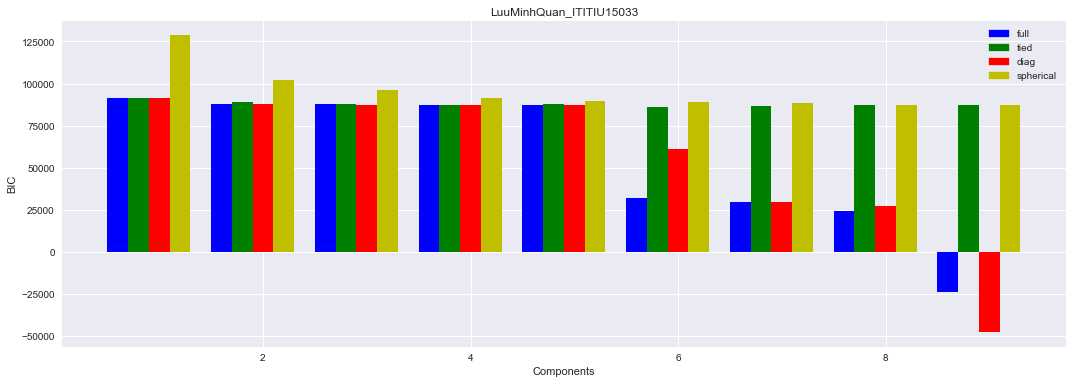

In [60]:
x = X_train[['city_name', 'vehicle_year', 'signup_channel']].values
y = y_train.values
plt.figure(figsize=(18, 6))
for i in range(1,10):
    gmm = GMM(n_components=i, covariance_type='full').fit(x)
    plt.bar(i - 0.4, gmm.bic(x), color = 'b', width = 0.2)
    gmm = GMM(n_components=i, covariance_type='tied').fit(x)
    plt.bar(i - 0.2, gmm.bic(x), color = 'g', width = 0.2)
    gmm = GMM(n_components=i, covariance_type='diag').fit(x)
    plt.bar(i + 0.0, gmm.bic(x), color = 'r', width = 0.2)
    gmm = GMM(n_components=i, covariance_type='spherical').fit(x)
    plt.bar(i + 0.2, gmm.bic(x), color = 'y', width = 0.2)
    
plt.legend(handles=[mpatches.Patch(color=a, label=b) for (a,b) in zip(['b','g','r','y'],['full','tied','diag','spherical'])])
plt.xlabel('Components')
plt.ylabel('BIC')
plt.title('LuuMinhQuan_ITITIU15033')

Text(0.5,1,'LuuMinhQuan_ITITIU15033')

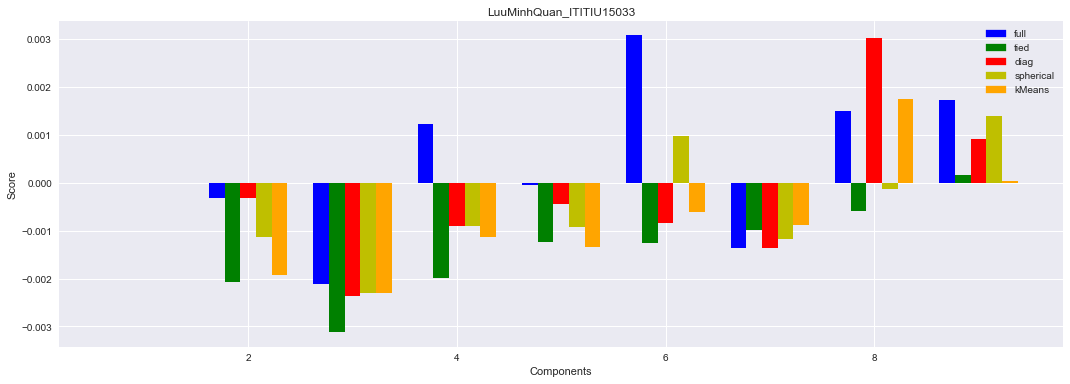

In [61]:
plt.figure(figsize=(18, 6))
for i in range(1,10):
    gmm = GMM(n_components=i, covariance_type='full').fit(x)
    plt.bar(i - 0.3, adjusted_rand_score(y, gmm.predict(x)), color = 'b', width = 0.15)
    gmm = GMM(n_components=i, covariance_type='tied').fit(x)
    plt.bar(i - 0.15, adjusted_rand_score(y, gmm.predict(x)), color = 'g', width = 0.15)
    gmm = GMM(n_components=i, covariance_type='diag').fit(x)
    plt.bar(i + 0.0, adjusted_rand_score(y, gmm.predict(x)), color = 'r', width = 0.15)
    gmm = GMM(n_components=i, covariance_type='spherical').fit(x)
    plt.bar(i + 0.15, adjusted_rand_score(y, gmm.predict(x)), color = 'y', width = 0.15)
    kmeans = KMeans(n_clusters=i, random_state=42).fit(x)
    plt.bar(i + 0.3, adjusted_rand_score(y, kmeans.predict(x)), color = 'orange', width = 0.15)
    
plt.legend(handles=[mpatches.Patch(color=a, label=b) for (a,b) in zip(['b','g','r','y','orange'],['full','tied','diag','spherical','kMeans'])])
plt.xlabel('Components')
plt.ylabel('Score')
plt.title('LuuMinhQuan_ITITIU15033')